# Python Basics for Neuroscience & Data Science
## Part 1

Welcome! This notebook will teach you Python programming using examples from neuroscience. Don't worry if you're new to both Python and neuroscience, we'll explain everything step by step.

### Why Python + Neuroscience?
- Python is a powerful tool for scientists: easy to read, great for data analysis, and free!
- Learning with real examples makes concepts stick better
- Neuroscience provides great examples for data analysis

Let's start with a quick demo to see what Python can do!

Disclaimer: most of the content you see below is adapted from the excellent work by Mark Kramer and Uri Eden in "Case Studies in Neural Data Analysis" and modified slightly to fit the purposes of our workshop. (https://github.com/Mark-Kramer/Case-Studies-Python). 

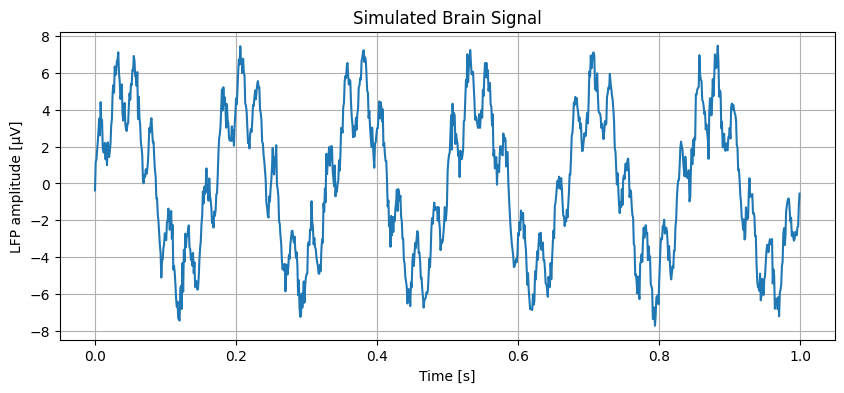

In [9]:
# Quick demo: Simulating brain signals
import numpy as np
import matplotlib.pyplot as plt

# Create simulated LFP data
sampling_rate = 1000  # Hz
duration = 5  # seconds
t = np.linspace(0, duration, int(sampling_rate * duration))

# Generate brain rhythms
theta = 5 * np.sin(2 * np.pi * 6 * t)  # 6 Hz theta rhythm
gamma = 2 * np.sin(2 * np.pi * 40 * t)  # 40 Hz gamma rhythm
noise = np.random.normal(0, 0.5, len(t))
LFP = theta + gamma + noise

# Plot the first second
plt.figure(figsize=(10, 4))
plt.plot(t[t < 1], LFP[t < 1])
plt.xlabel('Time [s]')
plt.ylabel('LFP amplitude [μV]')
plt.title('Simulated Brain Signal')
plt.grid(True)
plt.show()

# Python Basics: From Simple to Complex

## 1. Python as a Calculator
Let's start with basic math - Python can do simple and complex calculations:

In [ ]:
# Basic math operations
print("Simple math:")
print("4 + 9 =", 4 + 9)
print("4 / 3 =", 4 / 3)
print("2 * 5 =", 2 * 5)
print("2³ =", 2 ** 3)

# More complex calculations
print("\nMore complex:")
print("4/(10(squared)) =", 4/10**2)
print("(4/10)(squared) =", (4/10)**2)

## 2. Data Types in Python

Now that we can do basic calculations, we need ways to store and work with different kinds of data. Just like a lab notebook needs different ways to record numbers, text, and yes/no results, Python has different types for storing different kinds of information.

| Type | What it is | Example in Neuroscience |
|------|------------|-------------------------|
| integer (`int`) | Whole numbers | Spike count: `42` |
| float | Decimal numbers | Voltage: `-70.5` |
| string (`str`) | Text | Region: `"hippocampus"` |
| boolean (`bool`) | True/False | Is spiking?: `True` |
| list | Collection of items | Spike times: `[1.2, 1.4, 1.8]` |
| dictionary (`dict`) | Labeled data | Recording info: `{'region': 'CA1'}` |

Understanding these types is crucial as they form the building blocks for more complex data structures we'll use later. Let's see these in action:

In [ ]:
# Python Data Types with Neuroscience Examples

# Integer (int): whole numbers
sampling_rate = 1000  # Example: sampling_rate = 500 or -42

# Float: decimal numbers
membrane_potential = -70.5  # Example: voltage = 3.14 or -0.001

# String (str): text
neuron_type = 'Pyramidal Cell'  # Example: text = 'hello' or "world"

# Boolean (bool): True/False
is_spiking = True  # Example: is_active = False

# List: ordered collection, mutable (changeable)
spike_times = [10.2, 15.7, 20.1, 25.3]  # Example: numbers = [1, 2, 3]

# Dictionary (dict): key-value pairs
recording_info = {
    'subject': 'Mouse1', 
    'brain_region': 'Hippocampus',
    'recording_type': 'in-vivo'
}  # Example: person = {'name': 'John', 'age': 30}

# None: represents absence of value
no_response = None  # Example: result = None

# Print each variable with its type
print("Sampling rate:", sampling_rate, type(sampling_rate))
print("Membrane potential:", membrane_potential, type(membrane_potential))
print("Neuron type:", neuron_type, type(neuron_type))
print("Is spiking:", is_spiking, type(is_spiking))
print("Spike times:", spike_times, type(spike_times))
print("Recording info:", recording_info, type(recording_info))
print("No response:", no_response, type(no_response))

## 3. Organizing Data: Dictionaries

We've seen how lists can store sequences of data, but neuroscience experiments often have many related pieces of information that need to be organized. This is where dictionaries come in - they let us store data with descriptive labels, making our code more readable and maintainable.

Dictionaries are used to store data values in key:value pairs. Think of them like a lab notebook's metadata section, where each measurement has a clear label.

### Creating a Dictionary
```python
my_dict = {
    'key1': 'value1',
    'key2': 'value2'
}
```

### Accessing Values
```python
value = my_dict['key1']
```

### Example: Storing recording information
```python
recording_info = {
    'subject_id': 'M1',
    'age': 6,
    'brain_region': 'hippocampus'
}
```

Let's work with some dictionaries that combine the different data types we learned about:

In [ ]:
# Create a dictionary for experiment metadata
experiment_info = {
    'subject_id': 'M1',
    'age': 6,
    'strain': 'C57BL/6',
    'recording_date': '2025-07-27',
    'experimenter': 'Jane Doe'
}

# Create a dictionary for recording parameters
recording_params = {
    'sampling_rate': 1000,  # Hz
    'duration': 300,        # seconds
    'brain_region': 'hippocampus',
    'electrode_type': 'silicon probe',
    'n_channels': 4
}

# Print and access dictionary items
print("Experiment Information:")
print(f"Subject: {experiment_info['subject_id']}")
print(f"Age: {experiment_info['age']} years")
print(f"Date: {experiment_info['recording_date']}")

print("\nRecording Parameters:")
print(f"Sampling at {recording_params['sampling_rate']} Hz")
print(f"Recording from {recording_params['brain_region']}")

# Adding new information
experiment_info['notes'] = 'Good recording quality'

# Modifying existing information
recording_params['duration'] += 60  # Extended by 1 minute

print("\nUpdated recording duration:", recording_params['duration'], "seconds")

## 4. Working with Arrays: NumPy Basics

While Python lists and dictionaries are useful for organizing and labeling data (like experiment metadata or recording parameters), they aren't optimized for fast numerical computations on large datasets. In neuroscience, we often work with long time series, multi-channel recordings, or large matrices of spike data—tasks that require efficient storage and rapid mathematical operations.

NumPy arrays are designed specifically for this purpose. Unlike lists or dictionaries, NumPy arrays store data in contiguous memory blocks, allowing for vectorized operations and leveraging optimized C libraries under the hood. This makes them much faster and more memory-efficient, especially when performing repeated calculations or processing large-scale neural data.


### Creating Arrays
```python
import numpy as np
array_name = np.array([1, 2, 3, 4])
```

### Array Operations
```python
array_name + 1  # Add 1 to each element
array_name * 3  # Multiply each element by 3
```

### Common Functions
```python
np.mean(array_name)  # Calculate mean
np.std(array_name)   # Calculate standard deviation
```

Let's practice with some array operations that we'll need for analyzing neural data:

In [15]:
import numpy as np

# Creating arrays
simple_array = np.array([1, 2, 3, 4])
print("Simple array:", simple_array)

# Array operations with scalars
print("\nArray × 3:", simple_array * 3)
print("Array + 1:", simple_array + 1)
print("Array squared:", simple_array ** 2)

# Creating specialized arrays
print("\nSpecialized arrays:")
zeros = np.zeros(5)
ones = np.ones(5)
sequence = np.arange(0, 1, 0.2)  # Start, stop, step
print("Zeros:", zeros)
print("Ones:", ones)
print("Sequence:", sequence)

Simple array: [1 2 3 4]

Array × 3: [ 3  6  9 12]
Array + 1: [2 3 4 5]
Array squared: [ 1  4  9 16]

Specialized arrays:
Zeros: [0. 0. 0. 0. 0.]
Ones: [1. 1. 1. 1. 1.]
Sequence: [0.  0.2 0.4 0.6 0.8]


### Mini-Project: Analyzing Spike Trains
Let's combine what we've learned to analyze some neural spike data:
1. Create an array of spike times
2. Calculate mean firing rate
3. Find periods of high activity
4. Visualize the results

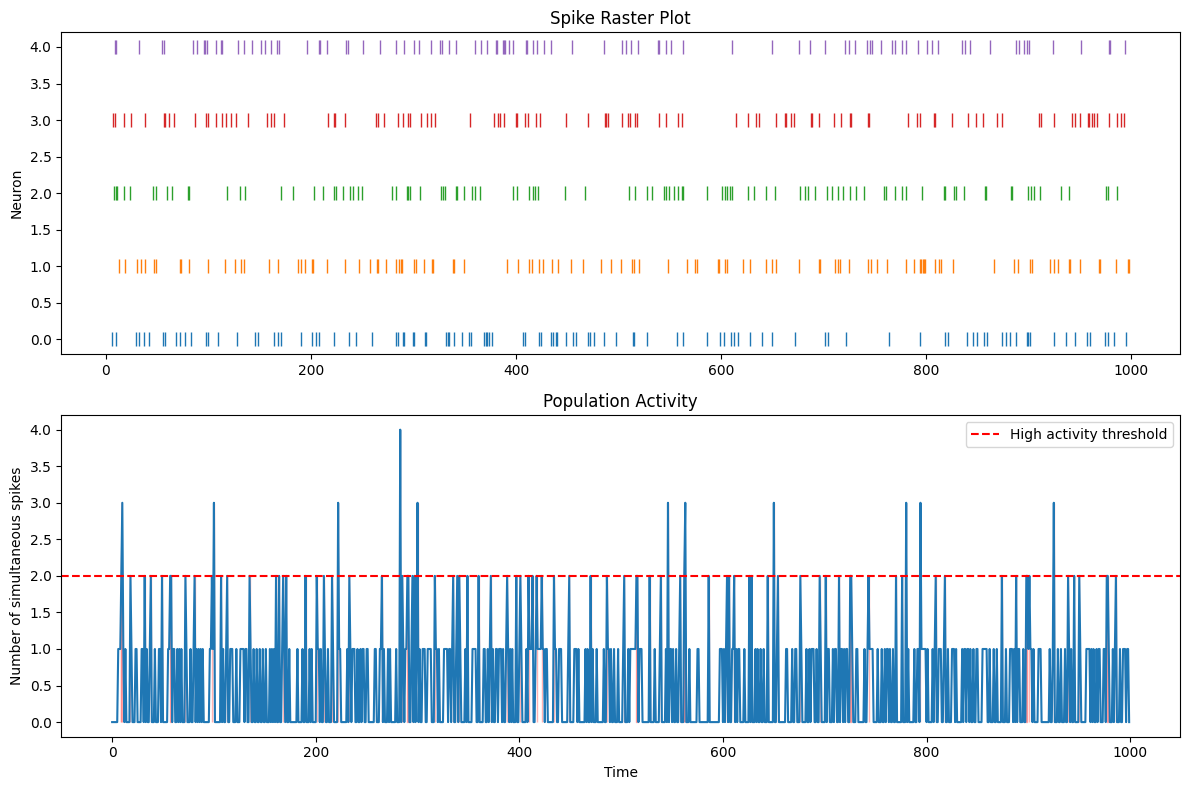

Average firing rates (Hz):
Neuron 1: 108.0 Hz
Neuron 2: 108.0 Hz
Neuron 3: 104.0 Hz
Neuron 4: 106.0 Hz
Neuron 5: 99.0 Hz

High activity periods: 94 timepoints


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create simulated spike data
np.random.seed(42)  # For reproducibility
n_neurons = 5
n_timepoints = 1000
spike_data = np.random.random((n_neurons, n_timepoints)) < 0.1  # 10% spike probability

# 2. Calculate firing rates
firing_rates = np.mean(spike_data, axis=1) * 1000  # Convert to Hz

# 3. Find high activity periods (when multiple neurons fire together)
simultaneous_spikes = np.sum(spike_data, axis=0)
high_activity = simultaneous_spikes >= 2

# 4. Visualize the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot spike raster
for i in range(n_neurons):
    spike_times = np.where(spike_data[i])[0]
    ax1.plot(spike_times, [i] * len(spike_times), '|', markersize=10)
ax1.set_ylabel('Neuron')
ax1.set_title('Spike Raster Plot')

# Plot population activity
ax2.plot(simultaneous_spikes)
ax2.axhline(2, color='r', linestyle='--', label='High activity threshold')
ax2.fill_between(range(len(high_activity)), 
                 simultaneous_spikes, 
                 where=high_activity,
                 alpha=0.3, color='red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Number of simultaneous spikes')
ax2.set_title('Population Activity')
ax2.legend()

plt.tight_layout()
plt.show()

print("Average firing rates (Hz):")
for i, rate in enumerate(firing_rates):
    print(f"Neuron {i+1}: {rate:.1f} Hz")
print(f"\nHigh activity periods: {np.sum(high_activity)} timepoints")

## 5. Working with Matrices and Scalars

NumPy provides powerful support for matrix operations, which are essential in neuroscience for handling multi-channel recordings and complex data transformations.

### Creating Matrices
```python
import numpy as np
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])  # 2x3 matrix
```

### Matrix Operations
```python
matrix.shape      # Get dimensions (2, 3)
matrix.T         # Transpose matrix
matrix @ matrix.T # Matrix multiplication
```

### Broadcasting
NumPy's broadcasting allows operations between arrays of different shapes:
```python
matrix + 1       # Add 1 to each element
matrix * 2       # Multiply each element by 2
```

Let's try some matrix operations:

In [2]:
import numpy as np

# Create a matrix (simulating multi-channel neural data)
neural_data = np.array([
    [1.2, 2.3, 3.1],  # Channel 1
    [0.8, 1.5, 2.7],  # Channel 2
    [2.1, 1.9, 3.4]   # Channel 3
])

print("Neural data matrix:")
print(neural_data)
print("\nMatrix shape:", neural_data.shape)
print("Matrix transpose:")
print(neural_data.T)

# Matrix operations
print("\nMatrix mean per channel:", np.mean(neural_data, axis=1))
print("Matrix correlation:", np.corrcoef(neural_data))

# Broadcasting example (normalize each channel)
channel_means = np.mean(neural_data, axis=1, keepdims=True)
normalized_data = neural_data - channel_means
print("\nNormalized data:")
print(normalized_data)

Neural data matrix:
[[1.2 2.3 3.1]
 [0.8 1.5 2.7]
 [2.1 1.9 3.4]]

Matrix shape: (3, 3)
Matrix transpose:
[[1.2 0.8 2.1]
 [2.3 1.5 1.9]
 [3.1 2.7 3.4]]

Matrix mean per channel: [2.2        1.66666667 2.46666667]
Matrix correlation: [[1.         0.97093477 0.74008438]
 [0.97093477 1.         0.87953603]
 [0.74008438 0.87953603 1.        ]]

Normalized data:
[[-1.          0.1         0.9       ]
 [-0.86666667 -0.16666667  1.03333333]
 [-0.36666667 -0.56666667  0.93333333]]


## 6. Array Indexing and Slicing

NumPy provides powerful ways to access and manipulate parts of arrays:

### Basic Indexing
```python
array[0]      # First element
array[-1]     # Last element
matrix[0, 1]  # First row, second column
```

### Slicing
```python
array[start:stop:step]  # General format
array[1:4]    # Elements from index 1 to 3
array[::2]    # Every second element
```

### Boolean Indexing
```python
array > 5     # Creates boolean mask
array[array > 5]  # Select elements > 5
```

Let's explore these concepts with neural data:

In [3]:
import numpy as np

# Create sample neural data (time series from 3 neurons)
spike_data = np.array([
    [0, 1, 0, 1, 0, 0, 1, 0, 1, 0],  # Neuron 1
    [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],  # Neuron 2
    [0, 0, 1, 1, 0, 1, 1, 0, 0, 1]   # Neuron 3
])

# Basic indexing
print("First neuron's activity:", spike_data[0])
print("First timepoint for all neurons:", spike_data[:, 0])

# Slicing
print("\nFirst 5 timepoints of second neuron:", spike_data[1, :5])
print("Activity every other timepoint:", spike_data[:, ::2])

# Boolean indexing
high_activity_times = np.sum(spike_data, axis=0) >= 2
print("\nTimepoints with 2 or more spikes:", high_activity_times)
print("Data at high activity times:")
print(spike_data[:, high_activity_times])

First neuron's activity: [0 1 0 1 0 0 1 0 1 0]
First timepoint for all neurons: [0 1 0]

First 5 timepoints of second neuron: [1 0 1 0 1]
Activity every other timepoint: [[0 0 0 1 1]
 [1 1 1 0 0]
 [0 1 0 1 0]]

Timepoints with 2 or more spikes: [False False  True  True False  True  True False False  True]
Data at high activity times:
[[0 1 0 1 0]
 [1 0 1 0 1]
 [1 1 1 1 1]]


## 7. Python Functions

Functions are reusable code blocks that perform a specific task. They help us organize code and avoid repetition.

### Defining a Function
```python
def function_name(parameters):
    # Code to perform the task
    return result
```

### Example: A function to calculate the firing rate
```python
def calculate_firing_rate(spike_times, window_start, window_end):
    window_duration = (window_end - window_start) / 1000  # Convert to seconds
    spikes_in_window = sum(1 for spike in spike_times 
                          if window_start <= spike <= window_end)
    return spikes_in_window / window_duration
```

Let's try defining and using a function:

In [ ]:
# Function to calculate firing rate
def calculate_firing_rate(spike_times, window_start, window_end):
    """
    Calculate firing rate in a time window.
    """
    window_duration = (window_end - window_start) / 1000  # Convert to seconds
    spikes_in_window = sum(1 for spike in spike_times 
                          if window_start <= spike <= window_end)
    return spikes_in_window / window_duration

# Example usage
example_spikes = [10, 15, 20, 100, 105, 110, 200, 205, 210]
rate = calculate_firing_rate(example_spikes, 0, 250)
print(f"Firing rate: {rate:.1f} Hz")

## 8. Control Flow: Making Decisions

Now that we understand basic data types and functions, we need ways to make our code more dynamic. Control flow tools like `if` statements and loops let us execute code conditionally or repeatedly. This is essential for processing neural data where we often need to analyze data point by point or apply different analyses based on conditions.

### If Statements
```python
if condition:
    # Code to execute if condition is true
elif another_condition:
    # Code for another condition
else:
    # Code if no conditions are true
```

### For Loops
```python
for item in collection:
    # Do something with each item
```

### While Loops
```python
while condition:
    # Do something while condition is true
```

Let's see some examples:

In [ ]:
# If statement example
temperature = 20
if temperature > 25:
    print("It's warm outside!")
elif temperature < 15:
    print("It's cold outside!")
else:
    print("The temperature is moderate.")

# For loop example
spike_times = [10.2, 15.7, 20.1, 25.3, 30.5]
for spike in spike_times:
    print(f"Spike detected at {spike} ms")

# While loop example
countdown = 5
while countdown > 0:
    print("Countdown:", countdown)
    countdown -= 1  # Decrease countdown
print("Liftoff!")

## 9. Visualizing Data: Matplotlib Basics

Now that we can work with arrays, matrices, and process data using functions and control flow, we need to visualize our results. Data visualization is crucial in neuroscience - it helps us understand patterns in neural activity, verify our analyses, and communicate our findings.

Matplotlib is a popular library for creating static, animated, and interactive visualizations in Python. It works seamlessly with NumPy arrays, making it perfect for plotting neural data.

### Basic Plot
```python
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Plot title')
plt.show()
```

### Example: Plotting a sine wave
```python
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y)
plt.xlabel('Angle [radians]')
plt.ylabel('Sine value')
plt.title('Sine Wave')
plt.grid(True)
plt.show()
```

Let's create some plots using the array operations we learned earlier:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create time points
time = np.linspace(0, 1, 1000)

# Create a sine wave
frequency = 5  # 5 Hz
sine_wave = np.sin(2 * np.pi * frequency * time)

# Plot the sine wave
plt.figure(figsize=(10, 4))
plt.plot(time, sine_wave)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sine Wave Signal')
plt.grid(True)
plt.show()

# Create a cosine wave
cosine_wave = np.cos(2 * np.pi * frequency * time)

# Plot both waves
plt.figure(figsize=(10, 4))
plt.plot(time, sine_wave, label='Sine wave')
plt.plot(time, cosine_wave, label='Cosine wave', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sine and Cosine Waves')
plt.legend()
plt.grid(True)
plt.show()

## 10. Signal Processing Example: Working with Brain Signals

It's time to bring everything together! In real neuroscience research, we often need to combine all the concepts we've learned:
- We use **data types** to store different kinds of information
- **Dictionaries** help us organize our experimental parameters
- **NumPy arrays** efficiently store and process our signals
- **Functions** make our analysis code reusable
- **Control flow** helps us process data conditionally
- **Array indexing** lets us access specific time points
- **Matplotlib** helps us visualize our results

Let's create a complete example that demonstrates a typical neural data analysis workflow:
1. Create simulated brain signals (theta and gamma rhythms)
2. Apply basic processing using functions and loops
3. Visualize the results with subplots
4. Store and track analysis parameters using dictionaries

This example will show how all these concepts work together in real-world neuroscience analysis:

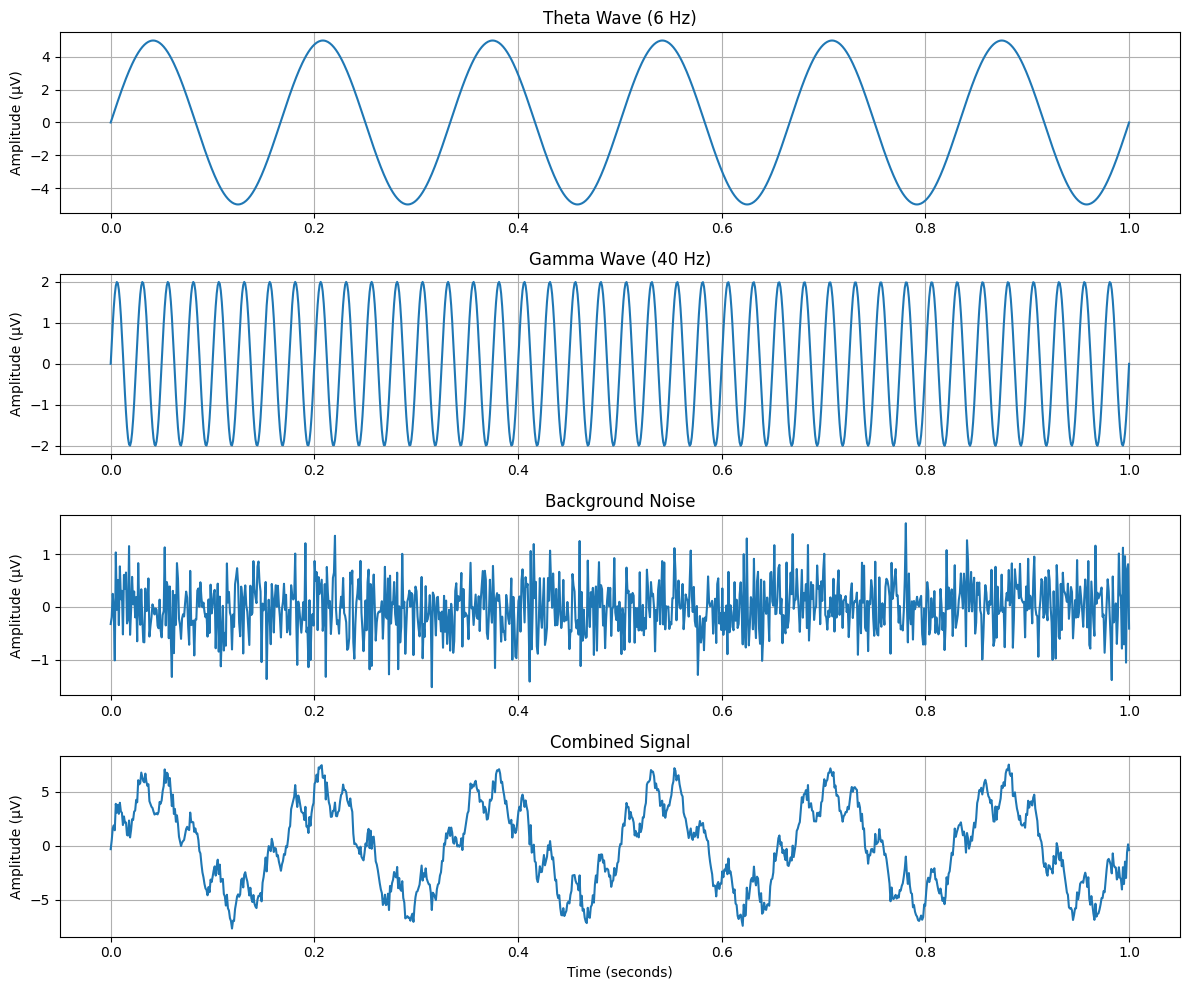


Signal Properties:
Theta amplitude: 5.00 µV
Gamma amplitude: 2.00 µV
Noise std: 0.49 µV
Combined signal range: 15.18 µV


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Create time points (1000 points over 1 second)
time = np.linspace(0, 1, 1000)

# Store parameters in a dictionary
signal_params = {
    'sampling_rate': 1000,
    'duration': 1.0,
    'theta_freq': 6,    # Hz
    'gamma_freq': 40,   # Hz
    'noise_level': 0.5
}

# Function to create brain waves
def create_brain_wave(time, frequency, amplitude):
    """Create a sinusoidal brain wave."""
    return amplitude * np.sin(2 * np.pi * frequency * time)

# Generate different components
theta = create_brain_wave(time, signal_params['theta_freq'], 5)
gamma = create_brain_wave(time, signal_params['gamma_freq'], 2)
noise = np.random.normal(0, signal_params['noise_level'], len(time))

# Combine signals
combined_signal = theta + gamma + noise

# Create subplots for visualization
fig, axes = plt.subplots(4, 1, figsize=(12, 10))

# Plot individual components
axes[0].plot(time, theta)
axes[0].set_title('Theta Wave (6 Hz)')
axes[0].set_ylabel('Amplitude (µV)')

axes[1].plot(time, gamma)
axes[1].set_title('Gamma Wave (40 Hz)')
axes[1].set_ylabel('Amplitude (µV)')

axes[2].plot(time, noise)
axes[2].set_title('Background Noise')
axes[2].set_ylabel('Amplitude (µV)')

axes[3].plot(time, combined_signal)
axes[3].set_title('Combined Signal')
axes[3].set_xlabel('Time (seconds)')
axes[3].set_ylabel('Amplitude (µV)')

# Add grid and adjust layout
for ax in axes:
    ax.grid(True)
plt.tight_layout()
plt.show()

# Calculate and print signal properties
print("\nSignal Properties:")
print(f"Theta amplitude: {np.ptp(theta)/2:.2f} µV")
print(f"Gamma amplitude: {np.ptp(gamma)/2:.2f} µV")
print(f"Noise std: {np.std(noise):.2f} µV")
print(f"Combined signal range: {np.ptp(combined_signal):.2f} µV")

## 11. Loading MATLAB Files in Python

So far, we've worked with simulated data that we created ourselves. However, in real research, you'll often need to work with data collected from actual experiments. Many neuroscience labs store their data in MATLAB's .mat format, so let's learn how to bring this data into Python and analyze it using all the tools we've learned.

This section is adapted from the excellent work by Mark Kramer and Uri Eden in "Case Studies in Neural Data Analysis" (https://github.com/Mark-Kramer/Case-Studies-Python). 

We'll use:
- NumPy arrays to hold the imported data
- Matplotlib to visualize it
- Python's scientific computing stack to process it

Let's see how to load and work with MATLAB files in Python:

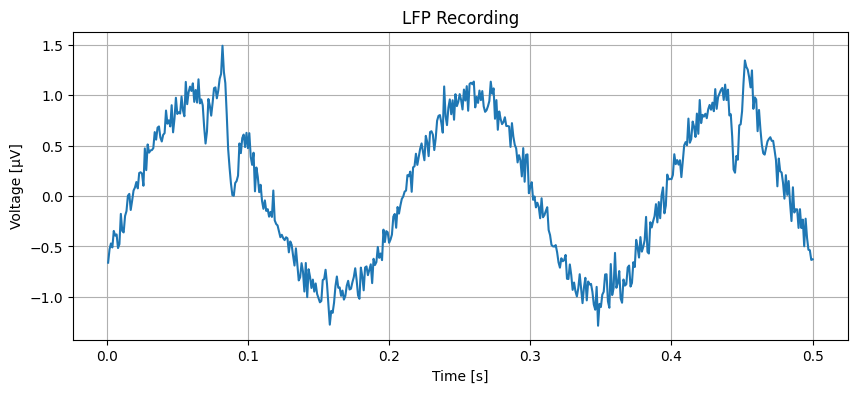

Recording duration: 100.0 seconds
Sampling rate: 1000.0 Hz
Number of samples: 100000


In [2]:
# Import required library for loading MATLAB files
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

# Load a .mat file
mat = sio.loadmat('sample_data.mat')

# Access data from the loaded file
t = mat['t'][0]     # Time axis
LFP = mat['LFP'][0] # Voltage recording

# Plot a subset of the data
plt.figure(figsize=(10, 4))
plt.plot(t[0:500], LFP[0:500])
plt.title('LFP Recording')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [μV]')
plt.grid(True)
plt.show()

# Print some basic information about the data
print(f"Recording duration: {t[-1]:.1f} seconds")
print(f"Sampling rate: {1/(t[2]-t[1]):.1f} Hz")
print(f"Number of samples: {len(LFP)}")

# Conclusion: Ready for Real Neuroscience!

You've learned Python programming through the lens of neuroscience, following a carefully structured path:

## 1. **Foundations** (check)
   - Basic math operations
   - Data types and variables  
   - Control flow (if/else, loops)
   - Functions for code organization

## 2. **Data Structures** (check)
   - Lists and dictionaries for organizing information
   - NumPy arrays for efficient computation
   - Matrices for multi-dimensional data
   - Array indexing and slicing

## 3. **Advanced Concepts** (check)
   - Multi-dimensional data handling
   - Trial averaging (the foundation of ERPs!)
   - Statistical analysis and confidence intervals
   - Data visualization with Matplotlib

## 4. **Real Applications** (check)
   - Signal processing techniques
   - File I/O with MATLAB data
   - Multi-trial data analysis workflow

Each concept builds on previous ones, and our progression from simple math to complex neuroscience analysis mirrors what you'll encounter in real research.

## Yay!! You're Ready for Part 2!

In Part 2, you'll apply these **exact same tools** to:
- Real human brain recordings (EEG data)
- Professional neuroscience analysis workflows  
- Advanced statistical methods (bootstrap)
- Publication-quality visualizations

**Remember**: The concepts are identical - we're just changing from simulated data to real brain data!

## Next Steps
- **Part 2**: Apply these skills to real EEG analysis
- **Beyond**: Explore additional libraries (scipy, pandas, seaborn)
- **Practice**: Modify our examples with your own ideas
- **Research**: Apply these techniques to your own questions

**The best way to learn is by doing!** Take these examples and make them your own.

## 12. Working with Multi-Dimensional Data

Now that we've mastered basic arrays, let's explore multi-dimensional data - this is crucial preparation for Part 2!

Many neuroscience datasets have multiple dimensions:
- **trials × time points** (like multiple EEG recordings)
- **channels × time points** (multi-electrode recordings) 
- **neurons × time points** (population recordings)

Understanding how to work with these structures is essential for analyzing real brain data. Let's practice with a simulated multi-trial experiment:

Data shape: (10, 100)
This means: 10 trials × 100 time points

Just like the EEG data we'll analyze in Part 2!


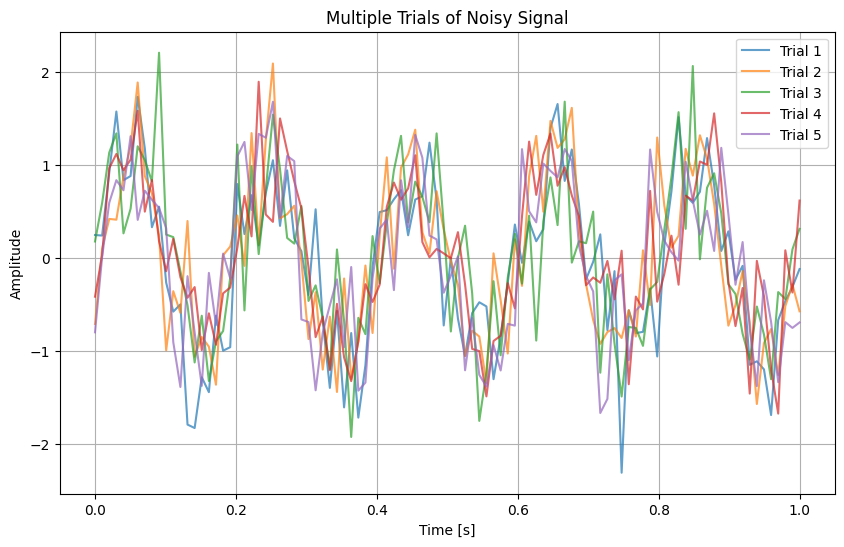

Notice how each trial looks different due to noise...
But they all contain the same underlying 5 Hz signal!


In [3]:
# Create a simple multi-trial dataset (like we'll see in Part 2!)
np.random.seed(42)  # For reproducibility
n_trials = 10
n_timepoints = 100
time = np.linspace(0, 1, n_timepoints)

# Simulate multiple trials of a signal with noise
trials_data = np.zeros((n_trials, n_timepoints))
for trial in range(n_trials):
    # Each trial has the same signal plus different noise
    signal = np.sin(2 * np.pi * 5 * time)  # 5 Hz signal
    noise = np.random.normal(0, 0.5, n_timepoints)
    trials_data[trial] = signal + noise

print(f"Data shape: {trials_data.shape}")
print("This means: {} trials × {} time points".format(*trials_data.shape))
print("\nJust like the EEG data we'll analyze in Part 2!")

# Plot first few trials
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(time, trials_data[i], alpha=0.7, label=f'Trial {i+1}')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Multiple Trials of Noisy Signal')
plt.legend()
plt.grid(True)
plt.show()

print("Notice how each trial looks different due to noise...")
print("But they all contain the same underlying 5 Hz signal!")

## 13. Averaging Across Trials: The Key to ERPs

Here's the key insight that makes Part 2 possible: **averaging reduces noise while preserving signal**. This is the foundation of Event-Related Potentials (ERPs)!

When we average many noisy measurements of the same underlying signal:
- Random noise tends to cancel out (positive and negative fluctuations balance)
- The consistent signal remains strong
- Our measurement becomes much cleaner and more reliable

Let's see this magic in action:

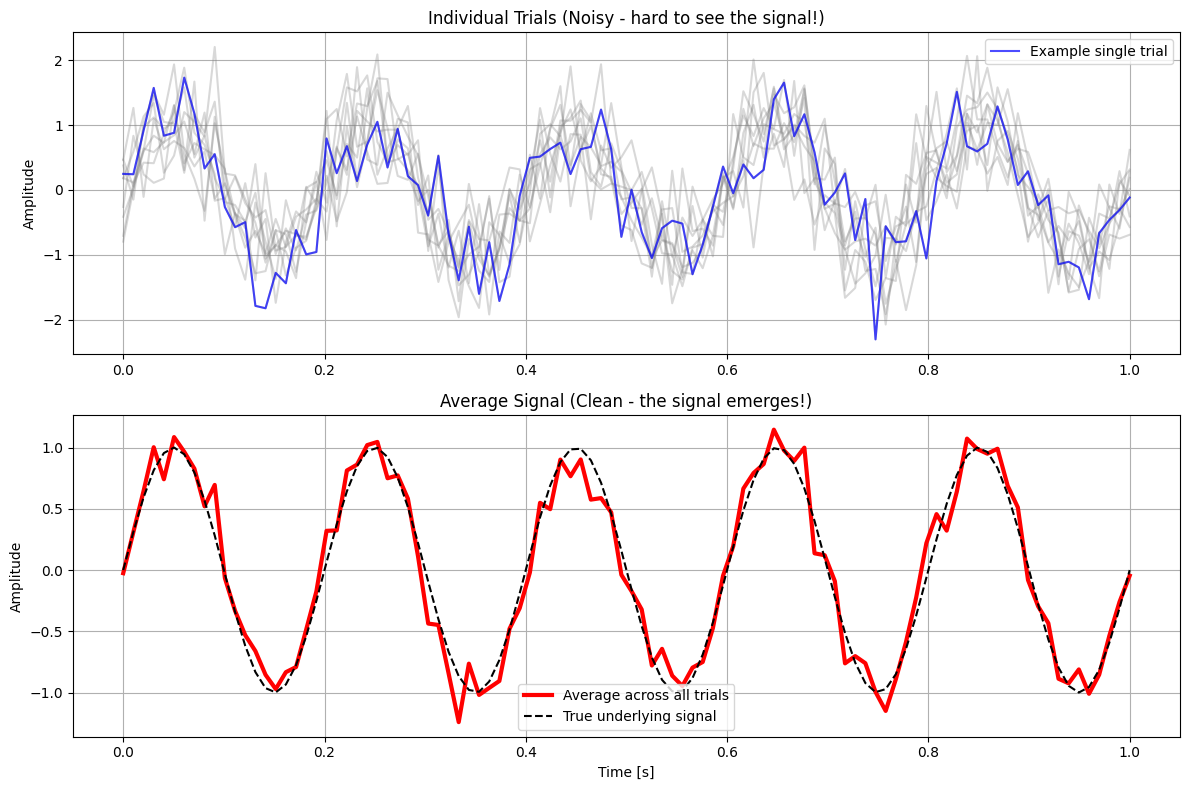

✨ The Magic of Averaging! ✨
Average signal peak: 1.146
True signal peak: 1.000
Difference: 0.146

This is EXACTLY what we'll do with brain signals in Part 2!
EEG trials are noisy → average them → reveal the ERP!


In [4]:
# Compute the average across trials (this is exactly what an ERP is!)
average_signal = np.mean(trials_data, axis=0)  # axis=0 means average across trials

# Plot individual trials vs average
plt.figure(figsize=(12, 8))

# Top subplot: Individual trials (noisy)
plt.subplot(2, 1, 1)
for i in range(n_trials):
    plt.plot(time, trials_data[i], 'gray', alpha=0.3)
plt.plot(time, trials_data[0], 'blue', alpha=0.7, label='Example single trial')
plt.ylabel('Amplitude')
plt.title('Individual Trials (Noisy - hard to see the signal!)')
plt.legend()
plt.grid(True)

# Bottom subplot: Average (clean!)
plt.subplot(2, 1, 2)
plt.plot(time, average_signal, 'red', linewidth=3, label='Average across all trials')
plt.plot(time, np.sin(2 * np.pi * 5 * time), 'black', linestyle='--', label='True underlying signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Average Signal (Clean - the signal emerges!)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("✨ The Magic of Averaging! ✨")
print(f"Average signal peak: {np.max(average_signal):.3f}")
print(f"True signal peak: {np.max(np.sin(2 * np.pi * 5 * time)):.3f}")
print(f"Difference: {abs(np.max(average_signal) - 1.0):.3f}")
print("\nThis is EXACTLY what we'll do with brain signals in Part 2!")
print("EEG trials are noisy → average them → reveal the ERP!")

## 14. Understanding Variability and Confidence

When we compute an average, we also want to know: **How reliable is this average?** 

In neuroscience, we use **confidence intervals** to show the uncertainty in our measurements. These tell us the range where the true value likely lies.

Key concepts for Part 2:
- **Standard deviation**: How much individual trials vary
- **Standard error**: How much our average might vary
- **Confidence intervals**: The range of likely values for our average

Let's compute these for our signal:

In [ ]:
# Calculate statistics (exactly like we'll do in Part 2!)
signal_std = np.std(trials_data, axis=0)  # Standard deviation across trials
signal_sem = signal_std / np.sqrt(n_trials)  # Standard error of the mean

# 95% confidence intervals (±2 standard errors)
ci_upper = average_signal + 2 * signal_sem
ci_lower = average_signal - 2 * signal_sem

# Plot with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(time, average_signal, 'red', linewidth=3, label='Average signal')
plt.fill_between(time, ci_lower, ci_upper, 
                 alpha=0.3, color='red', label='95% Confidence Interval')
plt.plot(time, np.sin(2 * np.pi * 5 * time), 'black', linestyle='--', 
         label='True signal', alpha=0.7)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Average Signal with Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()

print("📊 Statistical Summary:")
print(f"Number of trials: {n_trials}")
print(f"Average amplitude: {np.max(average_signal):.3f}")
print(f"Standard error: {np.max(signal_sem):.3f}")
print(f"Confidence interval width: {np.max(ci_upper - ci_lower):.3f}")
print("\nThe confidence interval tells us how reliable our average is.")
print("Narrower intervals = more confident in our measurement!")
print("\nIn Part 2, we'll use these EXACT same concepts with brain data!")

## 15. Preview: From Sine Waves to Brain Waves

🎉 **Congratulations!** You now have all the tools needed for Part 2!

Everything we've learned applies directly to real neuroscience data. Here's how Part 1 concepts connect to Part 2:

| **Part 1 Concept** | **Part 2 Application** |
|-------------------|------------------------|
| **Arrays** | Store EEG data instead of sine waves |
| **Multi-dimensional arrays** | Handle trials × time points of brain data |
| **Averaging** | Compute Event-Related Potentials (ERPs) |
| **Statistics** | Confidence intervals for brain responses |
| **Plotting** | Visualize brain activity over time |
| **Functions** | Organize EEG analysis code |
| **File loading** | Import real brain data from MATLAB files |

### The Big Picture
- **Part 1**: We practiced with artificial signals (sine waves, random data)
- **Part 2**: We'll apply the same techniques to real brain signals (EEG)

**Key insight**: The code is almost identical! The only difference is the source of the data.

In [1]:
# Let's preview the Part 2 workflow with our simulated data
print("🔬 Part 2 Preview: Brain Data Analysis Workflow")
print("=" * 50)

# Step 1: Load data (we simulated it, Part 2 loads real EEG)
print("✓ Step 1: Data loaded")
print(f"  Shape: {trials_data.shape} (trials × time points)")

# Step 2: Examine single trials (noisy, like real brain data)
print("✓ Step 2: Single trials examined (noisy)")
print(f"  Trial 1 range: {np.ptp(trials_data[0]):.2f}")

# Step 3: Compute average (ERP in Part 2)
erp_preview = np.mean(trials_data, axis=0)
print("✓ Step 3: Average computed (this will be the ERP)")
print(f"  Peak amplitude: {np.max(erp_preview):.3f}")

# Step 4: Add confidence intervals
std_preview = np.std(trials_data, axis=0)
sem_preview = std_preview / np.sqrt(n_trials)
print("✓ Step 4: Confidence intervals computed")
print(f"  Max confidence width: {np.max(2 * sem_preview):.3f}")

# Step 5: Statistical testing (comparing conditions in Part 2)
print("✓ Step 5: Ready for statistical comparisons")

print("\n🧠 In Part 2, we'll do this exact workflow with:")
print("  • Real EEG data from human brain recordings")
print("  • Two different experimental conditions")
print("  • Advanced bootstrap statistical methods")
print("  • Professional neuroscience visualizations")

print("\n💪 You're ready! The concepts are the same, just applied to brain data!")

🔬 Part 2 Preview: Brain Data Analysis Workflow
✓ Step 1: Data loaded


NameError: name 'trials_data' is not defined